In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

step1_df = pd.read_excel('Base_Model.xlsx', usecols = [1,2])
step2_df = pd.read_excel('Gray_Scale.xlsx', usecols = [1,2])
step3_df = pd.read_excel('Experience_Replay.xlsx', usecols = [1,2])
step4_df = pd.read_excel('Frame_Skipping.xlsx', usecols = [1,2])
step5_df = pd.read_excel('Max_Pooling.xlsx', usecols = [1,2])
step6_df = pd.read_excel('Update_Frequency.xlsx', usecols = [1,2])

In [166]:
from functools import reduce

data_frames = [step1_df.iloc[:,0], step2_df.iloc[:,0], step3_df.iloc[:,0], 
               step4_df.iloc[:,0], step5_df.iloc[:,0], step6_df.iloc[:,0]]

scores_df = reduce(lambda left, right:pd.merge(left, right, left_index = True, right_index = True), data_frames);

scores_df.rename(columns = {scores_df.columns[0]:'Step1', scores_df.columns[1]:'Step2', 
                            scores_df.columns[2]:'Step3', scores_df.columns[3]:'Step4', 
                            scores_df.columns[4]:'Step5', scores_df.columns[5]:'Step6'}, inplace = True)

In [167]:
avg_scores = pd.DataFrame()
data = {'Step1': scores_df['Step1'].rolling(window = 100, min_periods = 1).mean(),
        'Step2': scores_df['Step2'].rolling(window = 100, min_periods = 1).mean(),
        'Step3': scores_df['Step3'].rolling(window = 100, min_periods = 1).mean(),
        'Step4': scores_df['Step4'].rolling(window = 100, min_periods = 1).mean(),
        'Step5': scores_df['Step5'].rolling(window = 100, min_periods = 1).mean(),
        'Step6': scores_df['Step6'].rolling(window = 100, min_periods = 1).mean()}

avg_scores = pd.DataFrame(data)

In [168]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = "ticks", rc = custom_params, font_scale = 1.5)

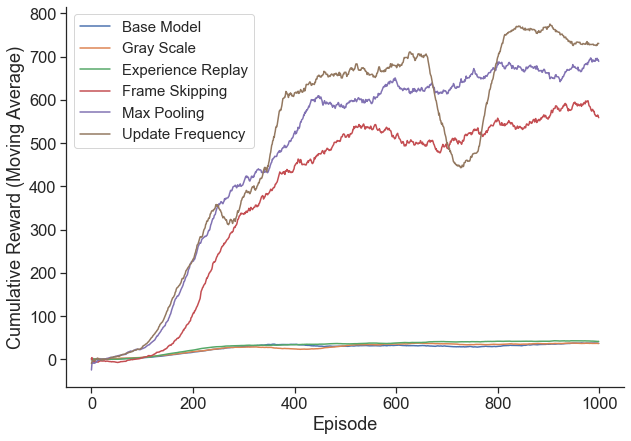

In [169]:
plt.figure(figsize = (10,7))

plt.ylabel('Cumulative Reward (Moving Average)')
plt.xlabel('Episode')
plt.plot(avg_scores);
plt.legend(['Base Model', 'Gray Scale', 'Experience Replay', 'Frame Skipping', 
            'Max Pooling', 'Update Frequency'], fontsize = 15, loc = 'best');

plt.savefig('All.png', dpi = 600)

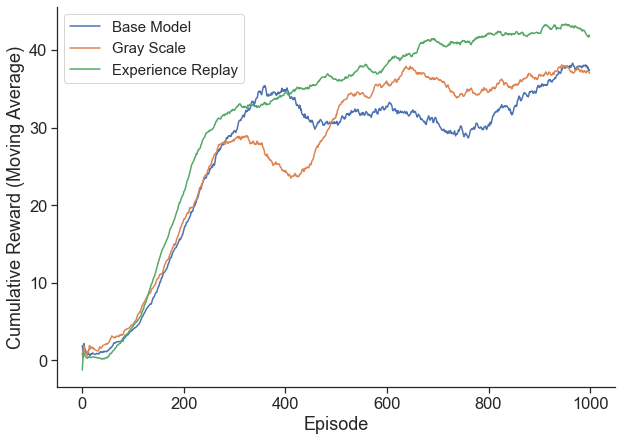

In [96]:
plt.figure(figsize = (10,7))

plt.ylabel('Cumulative Reward (Moving Average)')
plt.xlabel('Episode')
plt.plot(avg_scores.iloc[:,0:3]);
plt.legend(['Base Model', 'Gray Scale', 'Experience Replay'], fontsize = 15, loc = 'best');

plt.savefig('First3.png', dpi = 600)

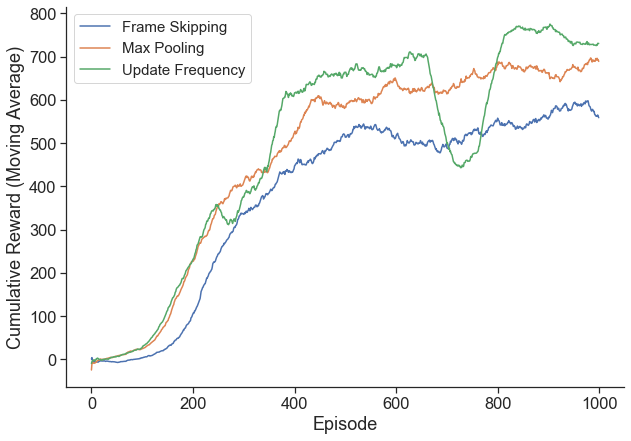

In [97]:
plt.figure(figsize = (10,7))

plt.ylabel('Cumulative Reward (Moving Average)')
plt.xlabel('Episode')
plt.plot(avg_scores.iloc[:,3:]);
plt.legend(['Frame Skipping', 'Max Pooling', 'Update Frequency'], fontsize = 15, loc = 'best');

plt.savefig('Last3.png', dpi = 600)

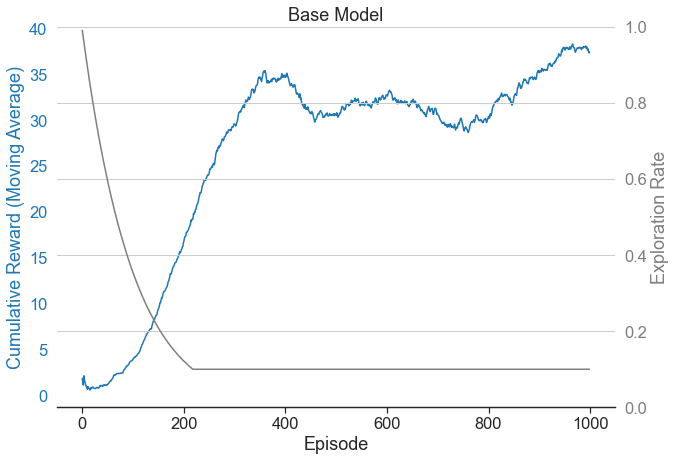

In [98]:
custom_params = {"axes.spines.top": False, "axes.spines.right": False, "axes.spines.left": False}
sns.set_theme(style = "ticks", rc = custom_params, font_scale = 1.5)

fig, ax1 = plt.subplots(figsize = (10,7))

color = 'tab:blue'
ax1.set_title('Base Model')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Cumulative Reward (Moving Average)', color = color)
ax1.plot(avg_scores.index, avg_scores['Step1'], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)


ax2 = ax1.twinx()

ax1.tick_params(left = False, right = False, bottom = True, top = False)
ax2.tick_params(left = False, right = False, bottom = False, top = False)

color = 'tab:gray'
ax2.set_ylabel('Exploration Rate', color = color)
ax2.plot(step1_df.index, step1_df['S1_Epsilon'], color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
ax2.set_ylim(0, 1)


ax1.yaxis.grid(False) 
ax2.yaxis.grid(True)   

plt.savefig('Base_Model_Score_vs_Epsilon.png', dpi = 600)

In [99]:
step5_df['S5_Epsilon']

0      0.995908
1      0.984816
2      0.974139
3      0.963385
4      0.953036
         ...   
995    0.100000
996    0.100000
997    0.100000
998    0.100000
999    0.100000
Name: S5_Epsilon, Length: 1000, dtype: float64

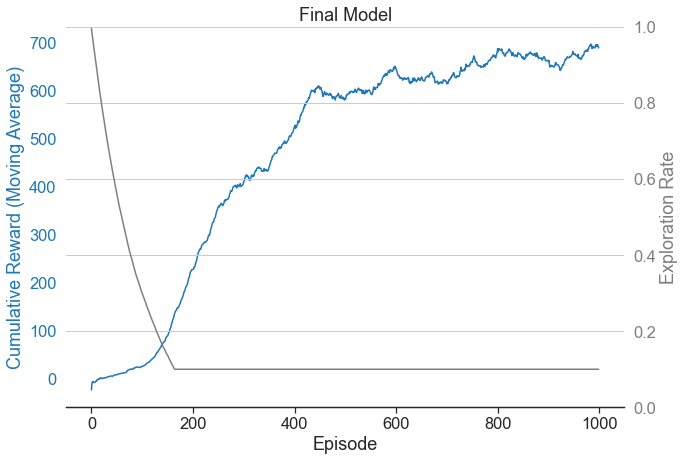

In [100]:
custom_params = {"axes.spines.top": False, "axes.spines.right": False, "axes.spines.left": False}
sns.set_theme(style = "ticks", rc = custom_params, font_scale = 1.5)

fig, ax1 = plt.subplots(figsize = (10,7))

color = 'tab:blue'
ax1.set_title('Final Model')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Cumulative Reward (Moving Average)', color = color)
ax1.plot(avg_scores.index, avg_scores['Step5'], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)


ax2 = ax1.twinx()

ax1.tick_params(left = False, right = False, bottom = True, top = False)
ax2.tick_params(left = False, right = False, bottom = False, top = False)

color = 'tab:gray'
ax2.set_ylabel('Exploration Rate', color = color)
ax2.plot(step5_df.index, step5_df['S5_Epsilon'], color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
ax2.set_ylim(0, 1)


ax1.yaxis.grid(False) 
ax2.yaxis.grid(True)   

plt.savefig('Final_Model_Score_vs_Epsilon.png', dpi = 600)

In [101]:
summary_statistics = scores_df.describe()

In [102]:
summary_statistics

Step1        Step2        Step3        Step4        Step5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     28.159971    28.715101    33.382848   407.895267   505.876890   
std      15.052875    13.555773    13.550848   261.863200   283.686695   
min      -1.554467    -4.002439    -1.504348   -85.088889   -35.852239   
25%      16.055853    19.890604    27.987948   212.831401   279.782996   
50%      29.496764    30.137113    35.987521   420.741502   543.824887   
75%      39.298204    38.418321    42.364644   602.623810   787.625871   
max      68.486081    65.751020    69.081081   853.854251   882.500000   

             Step6  
count  1000.000000  
mean    528.420868  
std     311.302434  
min    -100.244369  
25%     249.811924  
50%     634.797917  
75%     813.187949  
max     911.500000

In [103]:
np.round(scores_df.describe(), 2).to_excel('Summary_Statistics.xlsx')

In [104]:
scores_df_long = pd.melt(scores_df, value_vars = ['Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6'])

In [105]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = "ticks", rc = custom_params, font_scale = 1.5)

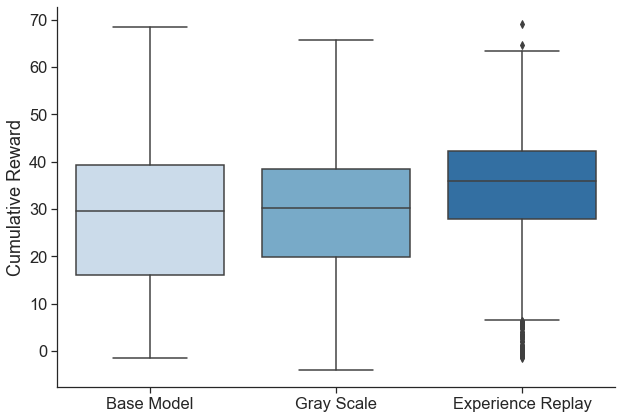

In [106]:
plt.figure(figsize = (10,7))

ax = sns.boxplot(data = scores_df_long.iloc[:3000,:], x = 'variable', y = 'value', palette = 'Blues')
ax.set(xlabel = '', ylabel = 'Cumulative Reward', xticklabels = ['Base Model', 'Gray Scale', 'Experience Replay']);

plt.savefig('Boxplot_First3.png', dpi = 600)

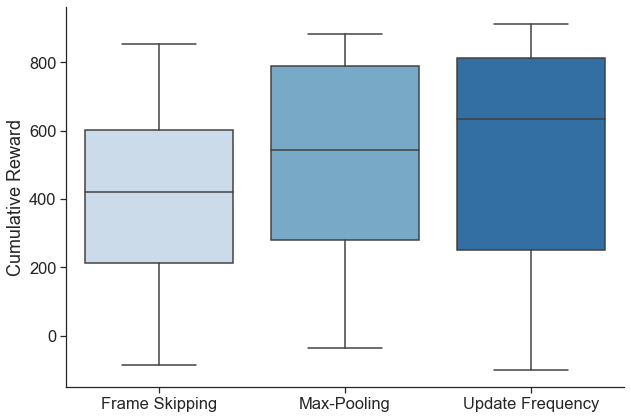

In [107]:
plt.figure(figsize = (10,7))

ax = sns.boxplot(data = scores_df_long.iloc[3000:,:], x = 'variable', y = 'value', palette = 'Blues')
ax.set(xlabel = '', ylabel = 'Cumulative Reward', xticklabels = ['Frame Skipping', 'Max-Pooling', 'Update Frequency']);

plt.savefig('Boxplot_Last3.png', dpi = 600)

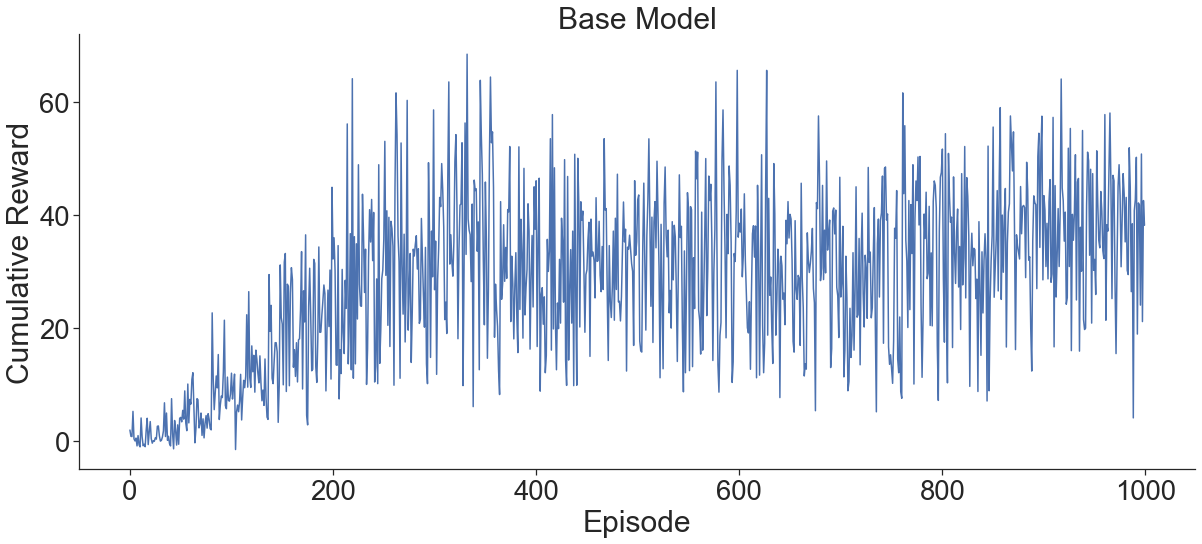

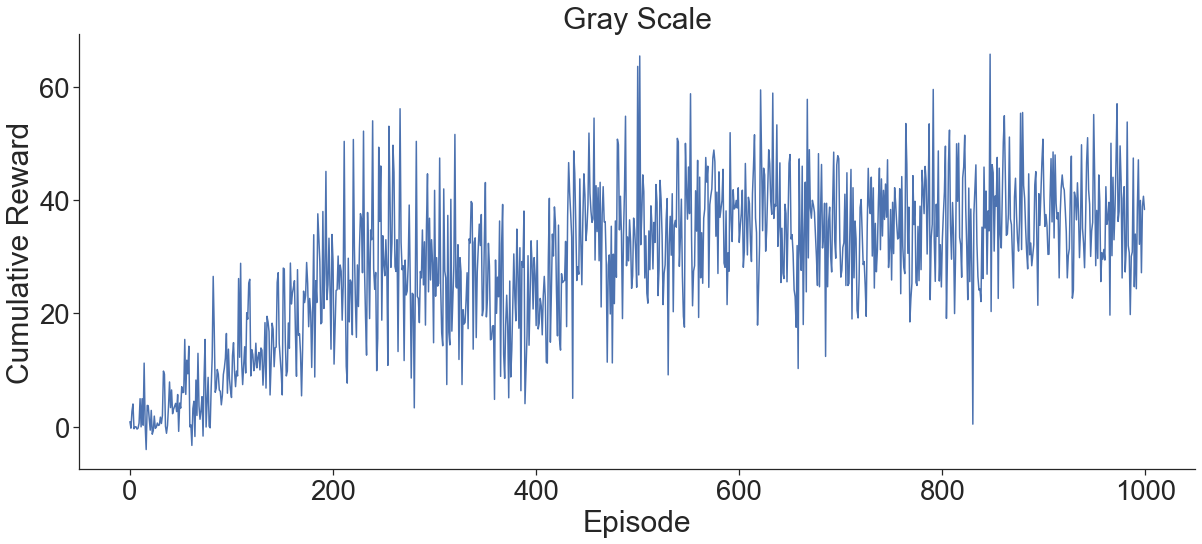

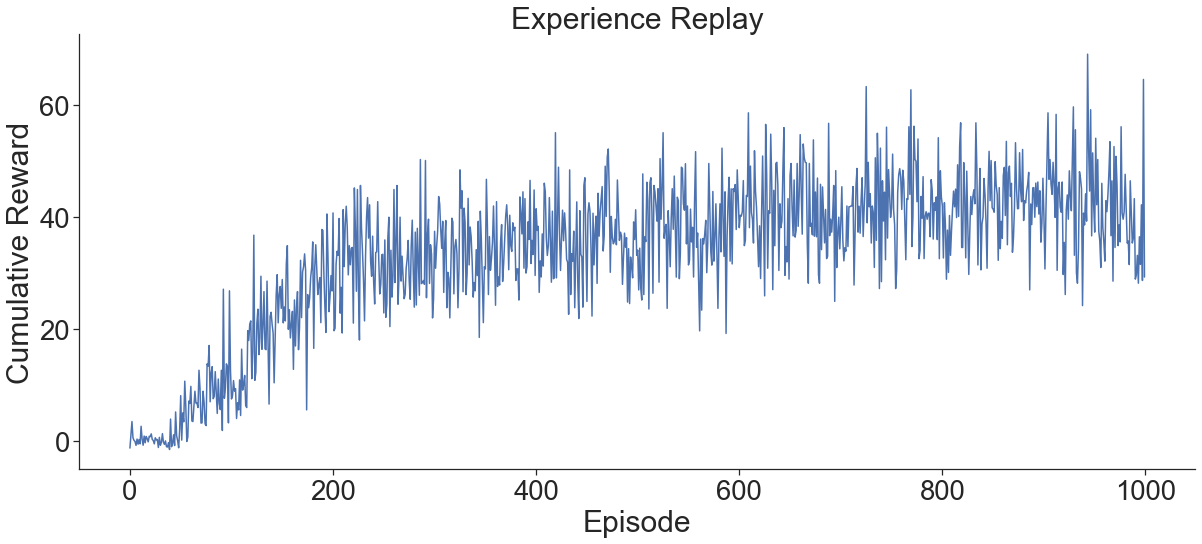

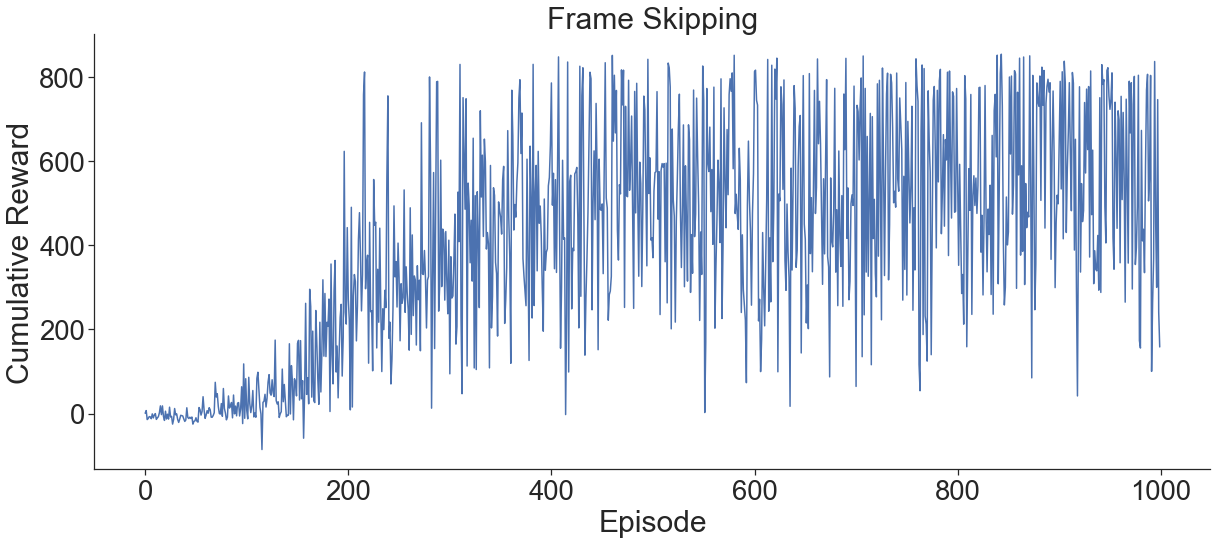

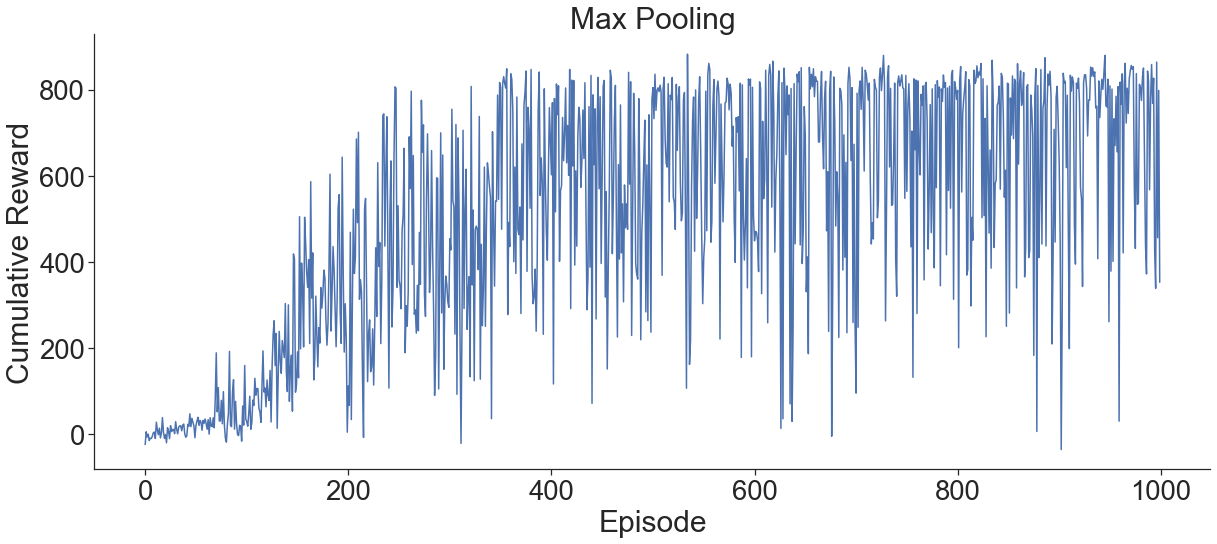

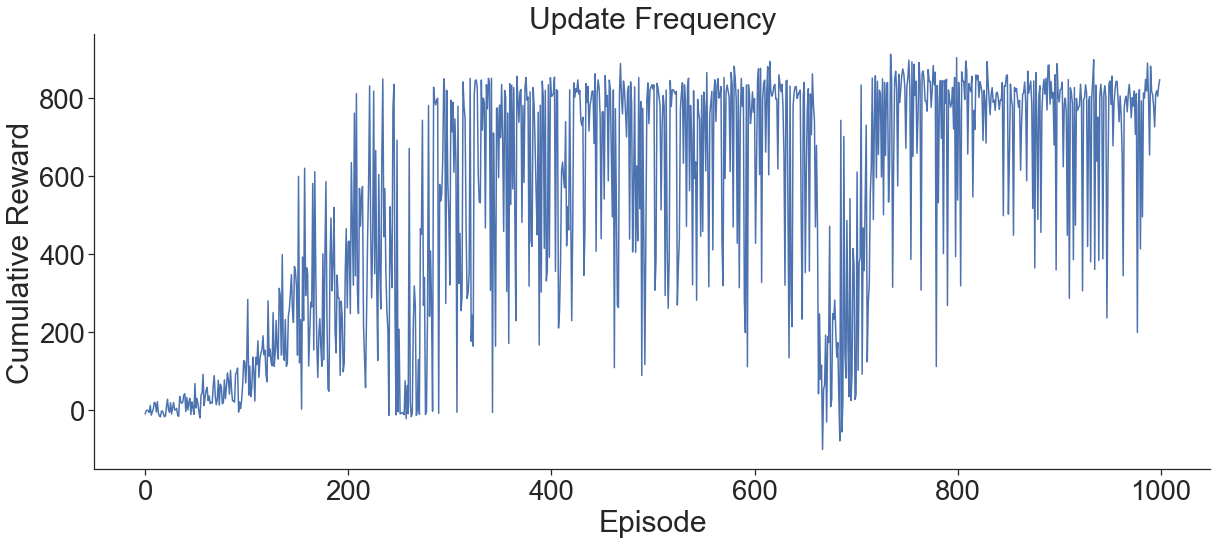

In [163]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = "ticks", rc = custom_params, font_scale = 2.5)
titles = ['Base Model', 'Gray Scale', 'Experience Replay', 'Frame Skipping', 'Max Pooling', 'Update Frequency']

for col in range(len(scores_df.columns)):
    
    plt.figure(figsize = (20,8))
    plt.title(titles[col])
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.plot(scores_df.iloc[:,col]);
    plt.savefig('Step' + str(col+1) + '.png', dpi = 600)

In [188]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = "ticks", rc = custom_params, font_scale = 1.5)

## Generalisation Train

In [110]:
train_dropout = pd.read_excel('Dropout-Train.xlsx', usecols = [1])
train_dropout['SMA_100'] = train_dropout['Score'].rolling(window = 100, min_periods = 1).mean()

train_l2 = pd.read_excel('L2-Train.xlsx', usecols = [1])
train_l2['SMA_100'] = train_l2['Score'].rolling(window = 100, min_periods = 1).mean()

train_dropout_l2 = pd.read_excel('Dropout+L2-Train.xlsx', usecols = [1])
train_dropout_l2['SMA_100'] = train_dropout_l2['Score'].rolling(window = 100, min_periods = 1).mean()

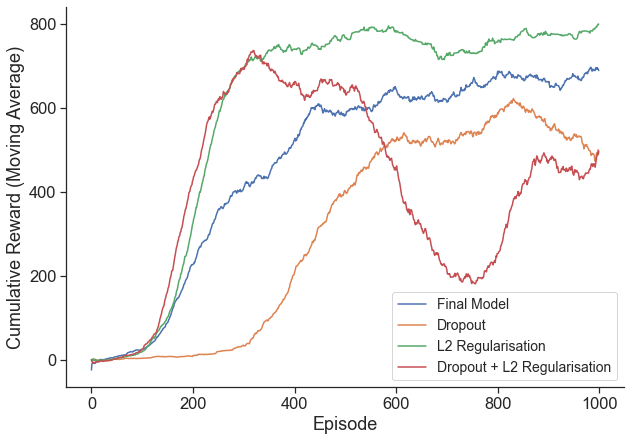

In [129]:
plt.figure(figsize = (10,7))

plt.ylabel('Cumulative Reward (Moving Average)')
plt.xlabel('Episode')
plt.plot(avg_scores['Step5']);
plt.plot(train_dropout['SMA_100']);
plt.plot(train_l2['SMA_100']);
plt.plot(train_dropout_l2['SMA_100']);
plt.legend(['Final Model', 'Dropout', 'L2 Regularisation', 'Dropout + L2 Regularisation'], fontsize = 14, loc = 'best');
plt.savefig('Generalisation-Train.png', dpi = 600);

## Final Model - Test

In [112]:
test_final_model_width20 = pd.read_excel('Final_Model-Test_Width_20.xlsx', usecols = [1])
test_final_model_width20['SMA_100'] = test_final_model_width20['Score'].rolling(window = 100, min_periods = 1).mean()

test_final_model_width25 = pd.read_excel('Final_Model-Test_Width_25.xlsx', usecols = [1])
test_final_model_width25['SMA_100'] = test_final_model_width25['Score'].rolling(window = 100, min_periods = 1).mean()

test_final_model_width30 = pd.read_excel('Final_Model-Test_Width_30.xlsx', usecols = [1])
test_final_model_width30['SMA_100'] = test_final_model_width30['Score'].rolling(window = 100, min_periods = 1).mean()

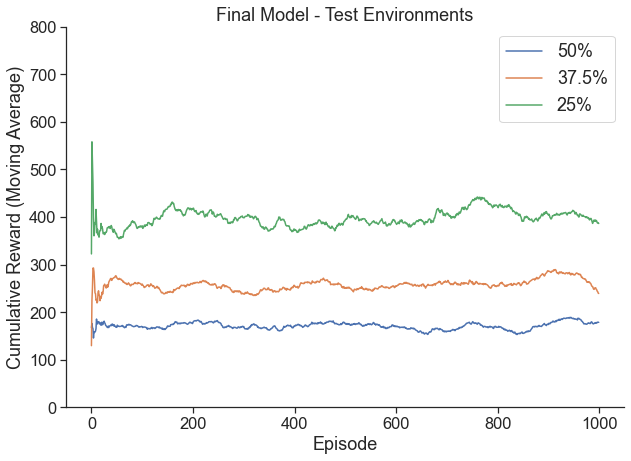

In [170]:
plt.figure(figsize = (10,7))
plt.title('Final Model - Test Environments');
plt.ylabel('Cumulative Reward (Moving Average)')
plt.xlabel('Episode')
plt.ylim(0, 800)
plt.plot(test_final_model_width20['SMA_100']);
plt.plot(test_final_model_width25['SMA_100']);
plt.plot(test_final_model_width30['SMA_100']);
plt.legend(['50%', '37.5%', '25%'], fontsize = 18, loc = 'best');
plt.savefig('Final_Model-Test.png', dpi = 600)

## Dropout - Test

In [114]:
test_dropout_width20 = pd.read_excel('Dropout-Test_Width_20.xlsx', usecols = [1])
test_dropout_width20['SMA_100'] = test_dropout_width20['Score'].rolling(window = 100, min_periods = 1).mean()

test_dropout_width25 = pd.read_excel('Dropout-Test_Width_25.xlsx', usecols = [1])
test_dropout_width25['SMA_100'] = test_dropout_width25['Score'].rolling(window = 100, min_periods = 1).mean()

test_dropout_width30 = pd.read_excel('Dropout-Test_Width_30.xlsx', usecols = [1])
test_dropout_width30['SMA_100'] = test_dropout_width30['Score'].rolling(window = 100, min_periods = 1).mean()

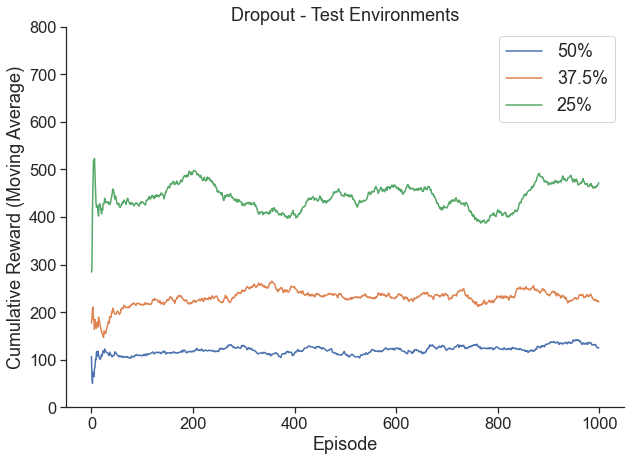

In [131]:
plt.figure(figsize = (10,7))
plt.title('Dropout - Test Environments');
plt.ylabel('Cumulative Reward (Moving Average)')
plt.xlabel('Episode')
plt.ylim(0, 800)
plt.plot(test_dropout_width20['SMA_100']);
plt.plot(test_dropout_width25['SMA_100']);
plt.plot(test_dropout_width30['SMA_100']);
plt.legend(['50%', '37.5%', '25%'], fontsize = 18, loc = 'best');
plt.savefig('Dropout-Test.png', dpi = 600)

## L2 - Test

In [116]:
test_l2_width20 = pd.read_excel('L2-Test_Width_20.xlsx', usecols = [1])
test_l2_width20['SMA_100'] = test_l2_width20['Score'].rolling(window = 100, min_periods = 1).mean()

test_l2_width25 = pd.read_excel('L2-Test_Width_25.xlsx', usecols = [1])
test_l2_width25['SMA_100'] = test_l2_width25['Score'].rolling(window = 100, min_periods = 1).mean()

test_l2_width30 = pd.read_excel('L2-Test_Width_30.xlsx', usecols = [1])
test_l2_width30['SMA_100'] = test_l2_width30['Score'].rolling(window = 100, min_periods = 1).mean()

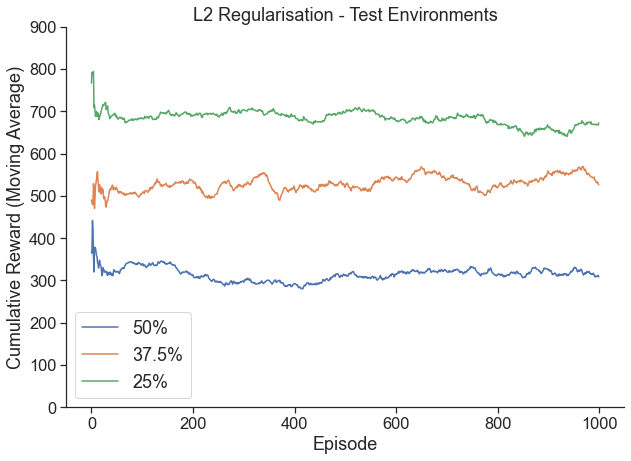

In [189]:
plt.figure(figsize = (10,7))
plt.title('L2 Regularisation - Test Environments');
plt.ylabel('Cumulative Reward (Moving Average)')
plt.xlabel('Episode')
plt.ylim(0, 900)
plt.plot(test_l2_width20['SMA_100']);
plt.plot(test_l2_width25['SMA_100']);
plt.plot(test_l2_width30['SMA_100']);
plt.legend(['50%', '37.5%', '25%'], fontsize = 18, loc = 'best');
plt.savefig('L2-Test.png', dpi = 600)

## Dropout + L2 - Test

In [118]:
test_dropout_l2_width20 = pd.read_excel('Dropout+L2-Test_Width_20.xlsx', usecols = [1])
test_dropout_l2_width20['SMA_100'] = test_dropout_l2_width20['Score'].rolling(window = 100, min_periods = 1).mean()

test_dropout_l2_width25 = pd.read_excel('Dropout+L2-Test_Width_25.xlsx', usecols = [1])
test_dropout_l2_width25['SMA_100'] = test_dropout_l2_width25['Score'].rolling(window = 100, min_periods = 1).mean()

test_dropout_l2_width30 = pd.read_excel('Dropout+L2-Test_Width_30.xlsx', usecols = [1])
test_dropout_l2_width30['SMA_100'] = test_dropout_l2_width30['Score'].rolling(window = 100, min_periods = 1).mean()

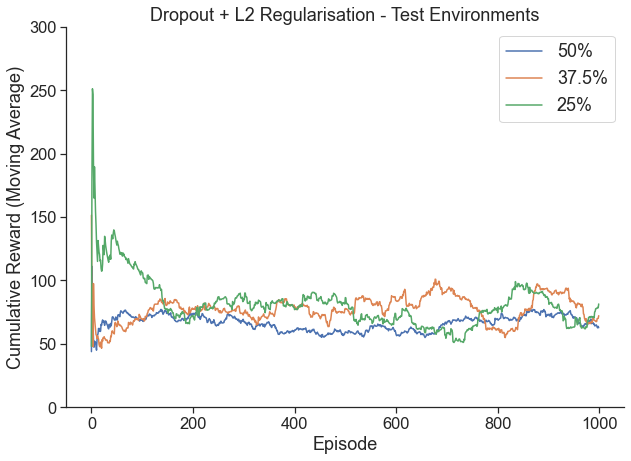

In [133]:
plt.figure(figsize = (10,7))
plt.title('Dropout + L2 Regularisation - Test Environments');
plt.ylabel('Cumulative Reward (Moving Average)')
plt.xlabel('Episode')
plt.ylim(0, 300)
plt.plot(test_dropout_l2_width20['SMA_100']);
plt.plot(test_dropout_l2_width25['SMA_100']);
plt.plot(test_dropout_l2_width30['SMA_100']);
plt.legend(['50%', '37.5%', '25%'], fontsize = 18, loc = 'best');
plt.savefig('Dropout+L2-Test.png', dpi = 600)

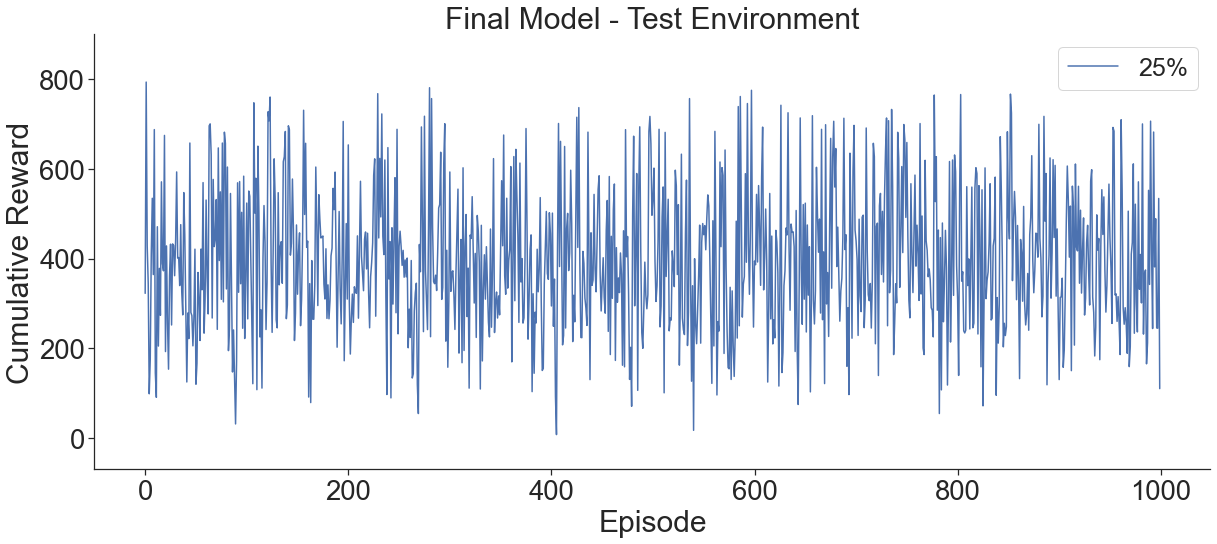

In [147]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = "ticks", rc = custom_params, font_scale = 2.5)

plt.figure(figsize = (20,8))

plt.title('Final Model - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_final_model_width30['Score']);
plt.legend(['25%'], fontsize = 25, loc = 'best');

plt.savefig('Final_Model-Test_30.png', dpi = 600)

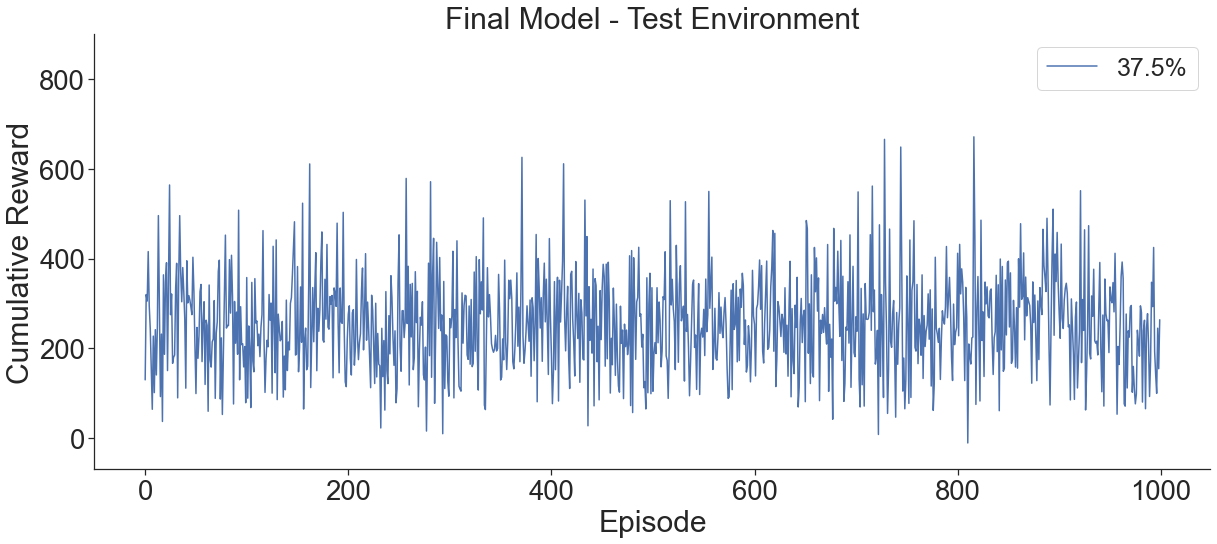

In [148]:
plt.figure(figsize = (20,8))

plt.title('Final Model - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_final_model_width25['Score']);
plt.legend(['37.5%'], fontsize = 25, loc = 'best');

plt.savefig('Final_Model-Test_25.png', dpi = 600)

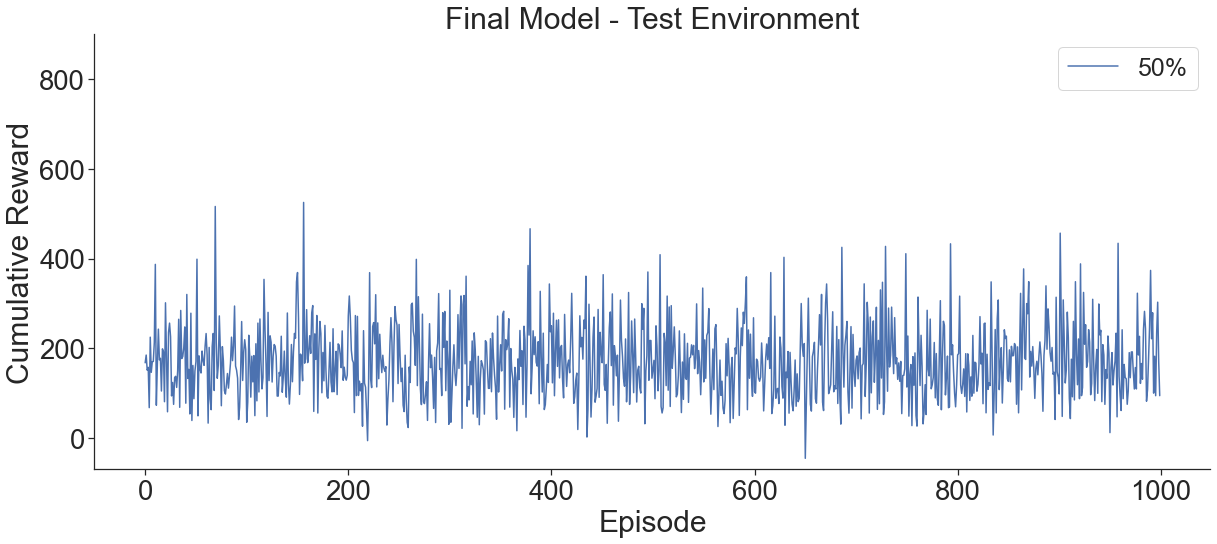

In [149]:
plt.figure(figsize = (20,8))

plt.title('Final Model - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_final_model_width20['Score']);
plt.legend(['50%'], fontsize = 25, loc = 'best');

plt.savefig('Final_Model-Test_20.png', dpi = 600)

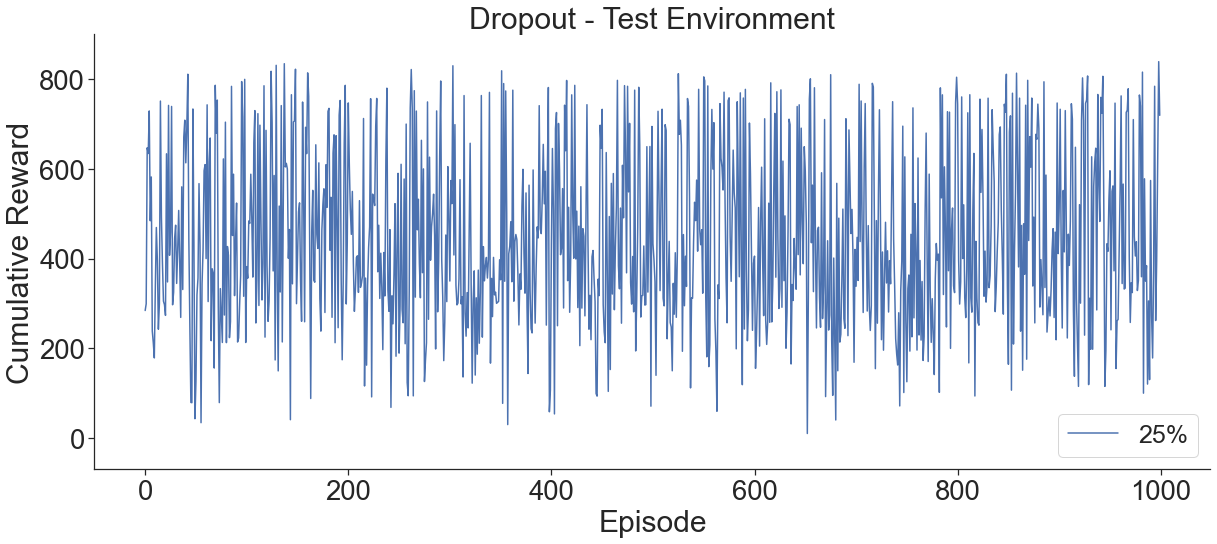

In [153]:
plt.figure(figsize = (20,8))

plt.title('Dropout - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_dropout_width30['Score']);
plt.legend(['25%'], fontsize = 25, loc = 'best');

plt.savefig('Dropout-Test_30.png', dpi = 600)

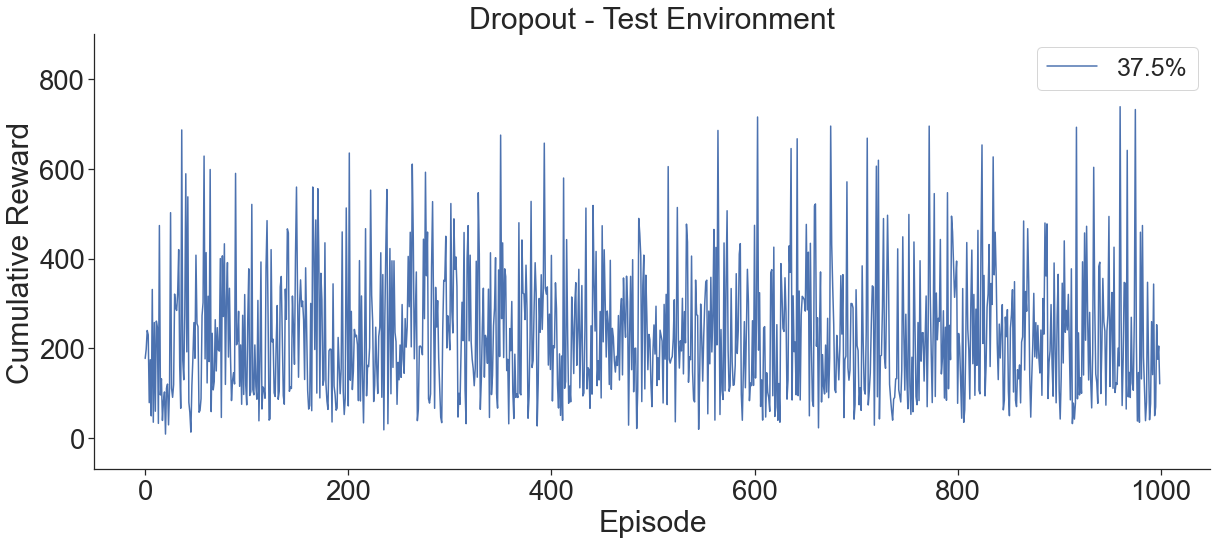

In [154]:
plt.figure(figsize = (20,8))

plt.title('Dropout - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_dropout_width25['Score']);
plt.legend(['37.5%'], fontsize = 25, loc = 'best');

plt.savefig('Dropout-Test_25.png', dpi = 600)

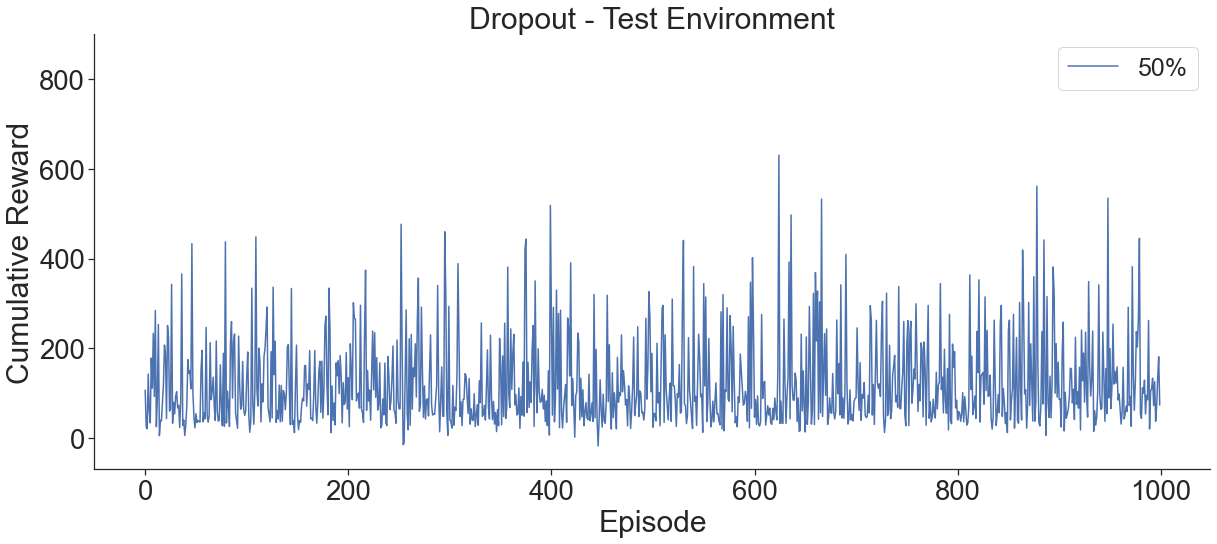

In [155]:
plt.figure(figsize = (20,8))

plt.title('Dropout - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_dropout_width20['Score']);
plt.legend(['50%'], fontsize = 25, loc = 'best');

plt.savefig('Dropout-Test_20.png', dpi = 600)

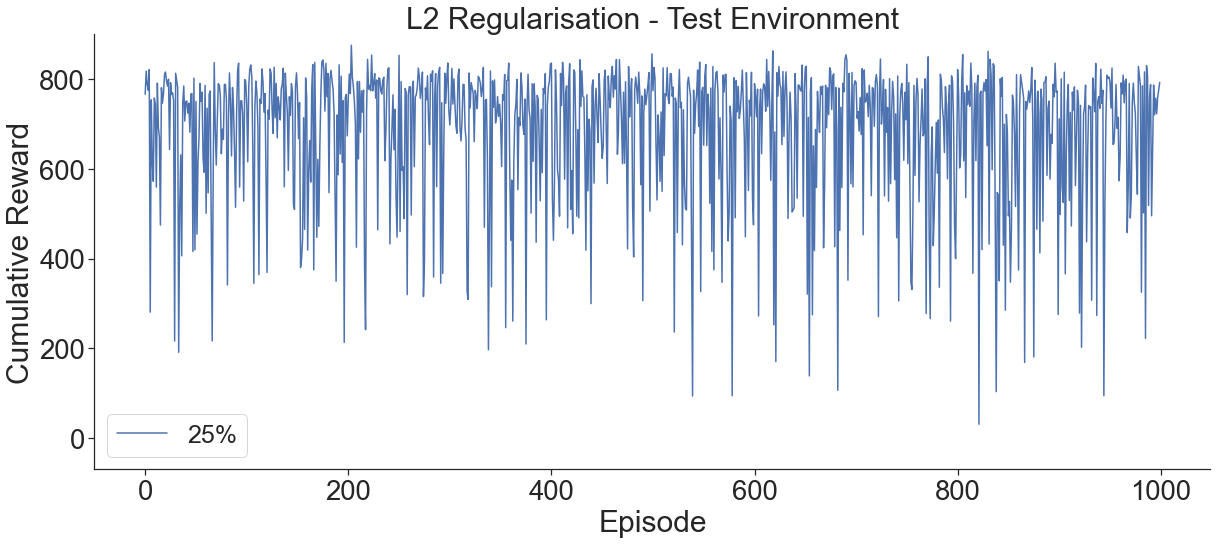

In [156]:
plt.figure(figsize = (20,8))

plt.title('L2 Regularisation - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_l2_width30['Score']);
plt.legend(['25%'], fontsize = 25, loc = 'best');

plt.savefig('L2-Test_30.png', dpi = 600)

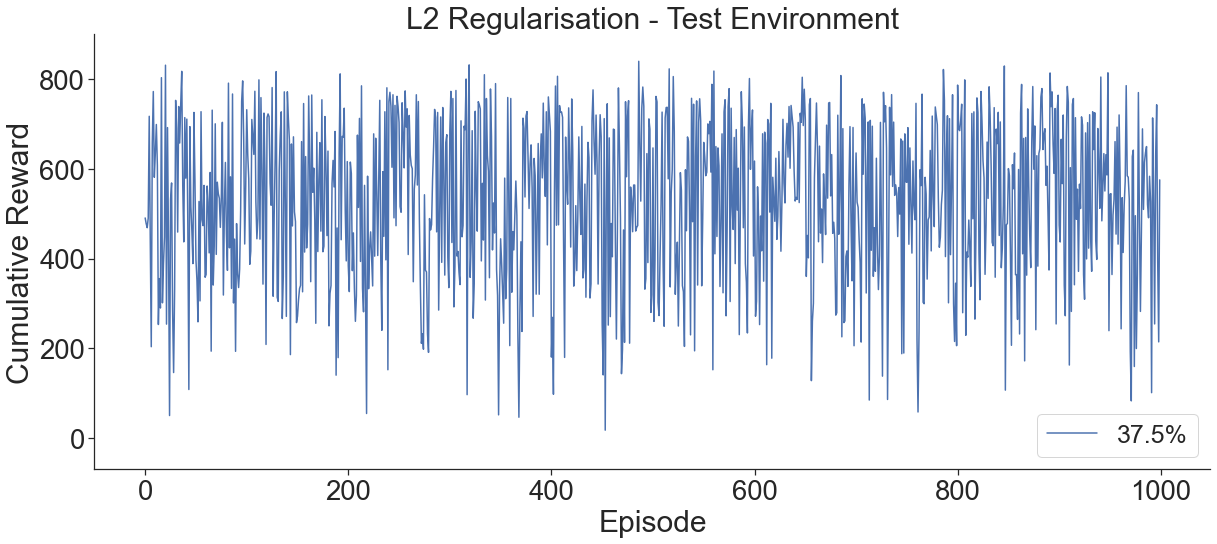

In [157]:
plt.figure(figsize = (20,8))

plt.title('L2 Regularisation - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_l2_width25['Score']);
plt.legend(['37.5%'], fontsize = 25, loc = 'best');

plt.savefig('L2-Test_25.png', dpi = 600)

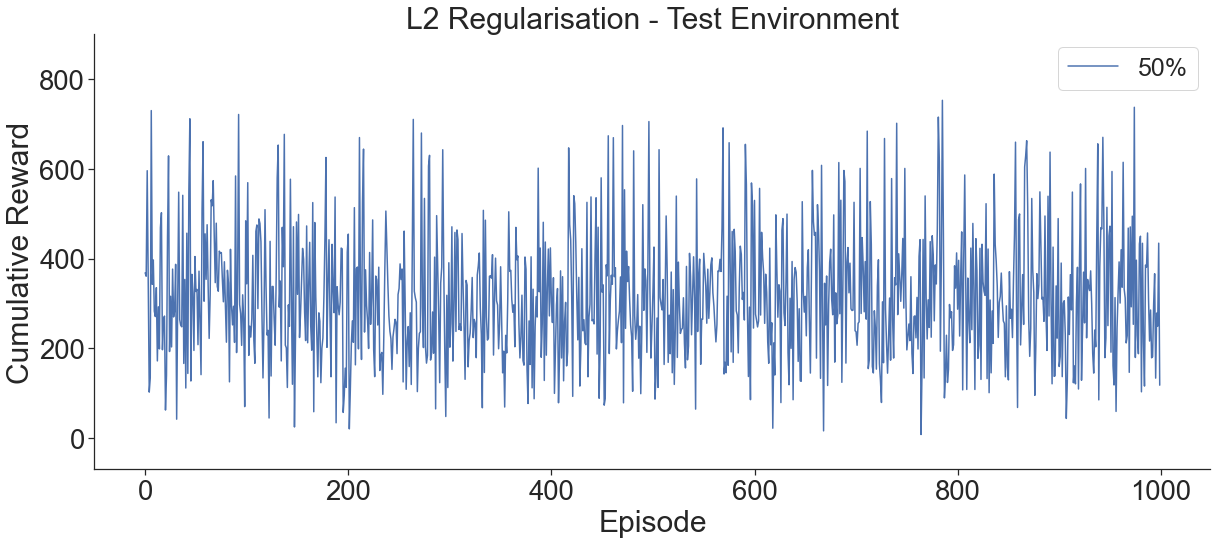

In [158]:
plt.figure(figsize = (20,8))

plt.title('L2 Regularisation - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_l2_width20['Score']);
plt.legend(['50%'], fontsize = 25, loc = 'best');

plt.savefig('L2-Test_20.png', dpi = 600)

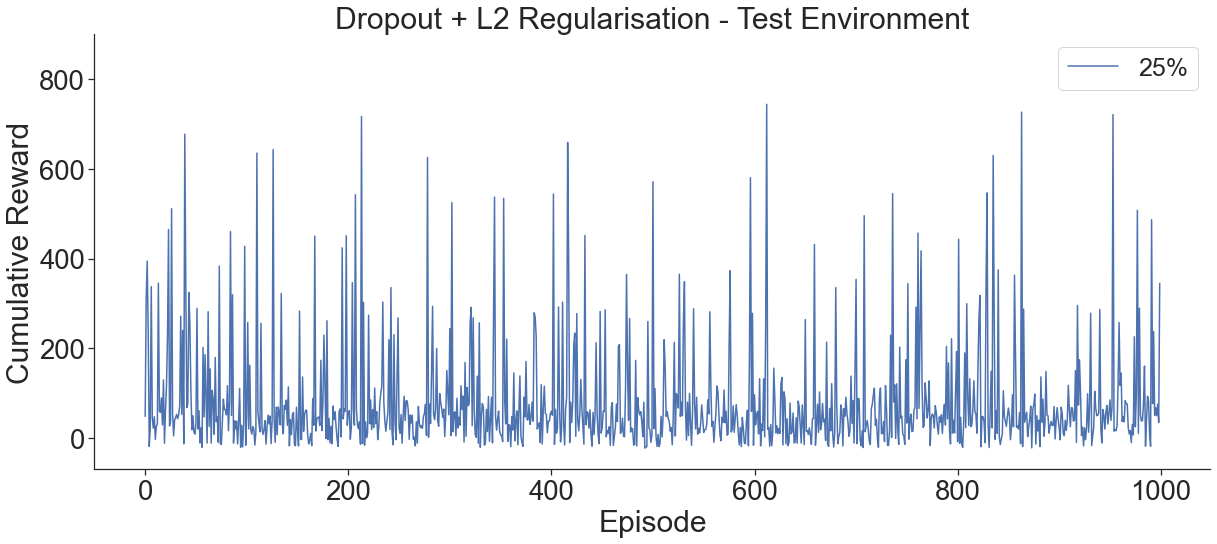

In [159]:
plt.figure(figsize = (20,8))

plt.title('Dropout + L2 Regularisation - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_dropout_l2_width30['Score']);
plt.legend(['25%'], fontsize = 25, loc = 'best');

plt.savefig('Dropout+L2-Test_30.png', dpi = 600)

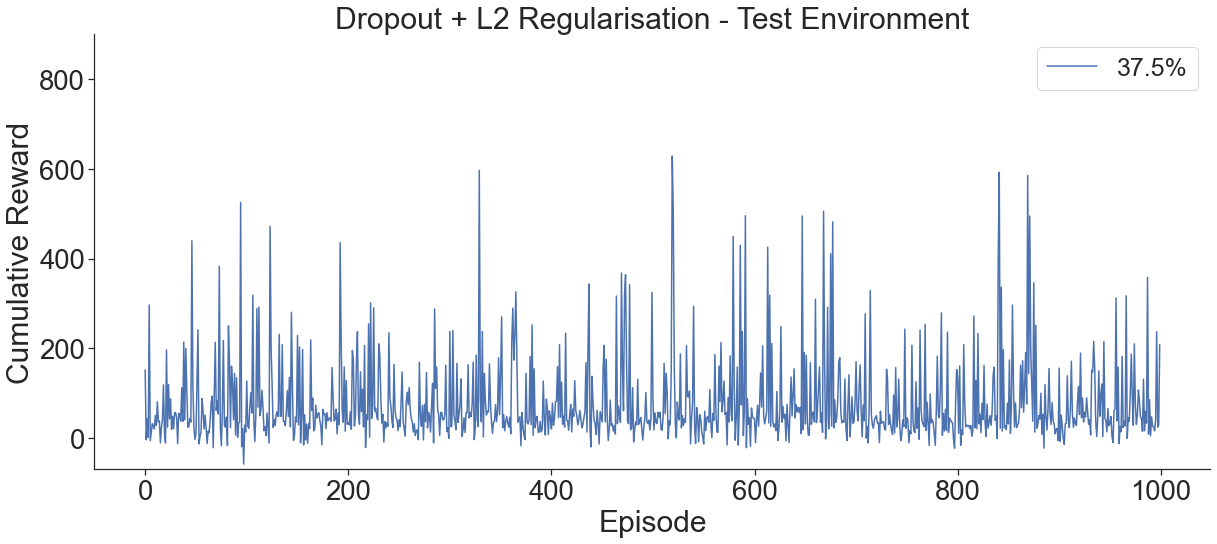

In [160]:
plt.figure(figsize = (20,8))

plt.title('Dropout + L2 Regularisation - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_dropout_l2_width25['Score']);
plt.legend(['37.5%'], fontsize = 25, loc = 'best');

plt.savefig('Dropout+L2-Test_25.png', dpi = 600)

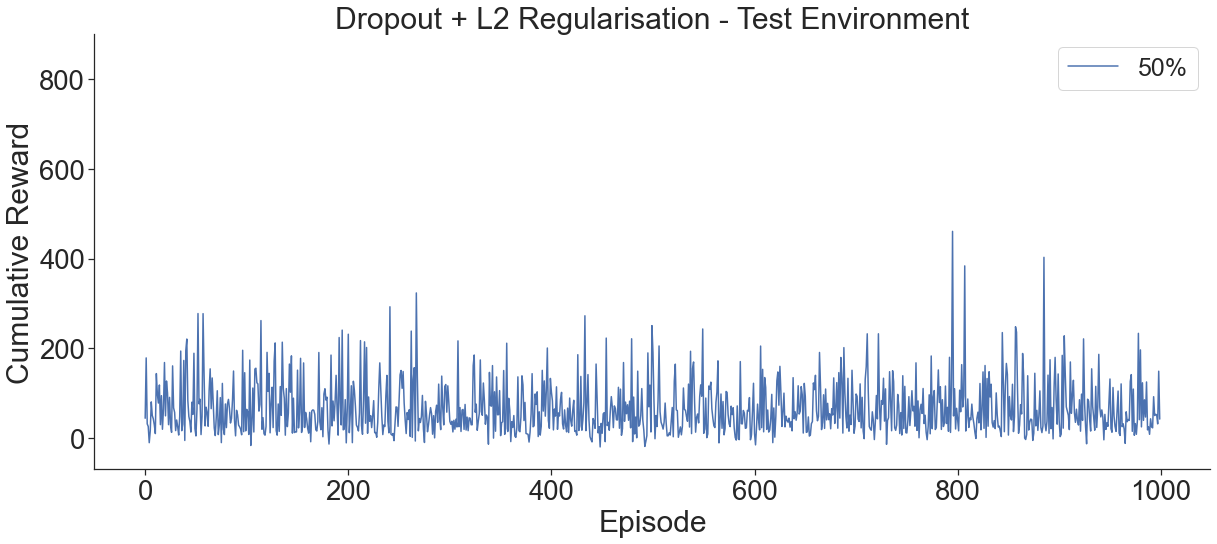

In [161]:
plt.figure(figsize = (20,8))

plt.title('Dropout + L2 Regularisation - Test Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-70, 900)
plt.plot(test_dropout_l2_width20['Score']);
plt.legend(['50%'], fontsize = 25, loc = 'best');

plt.savefig('Dropout+L2-Test_20.png', dpi = 600)

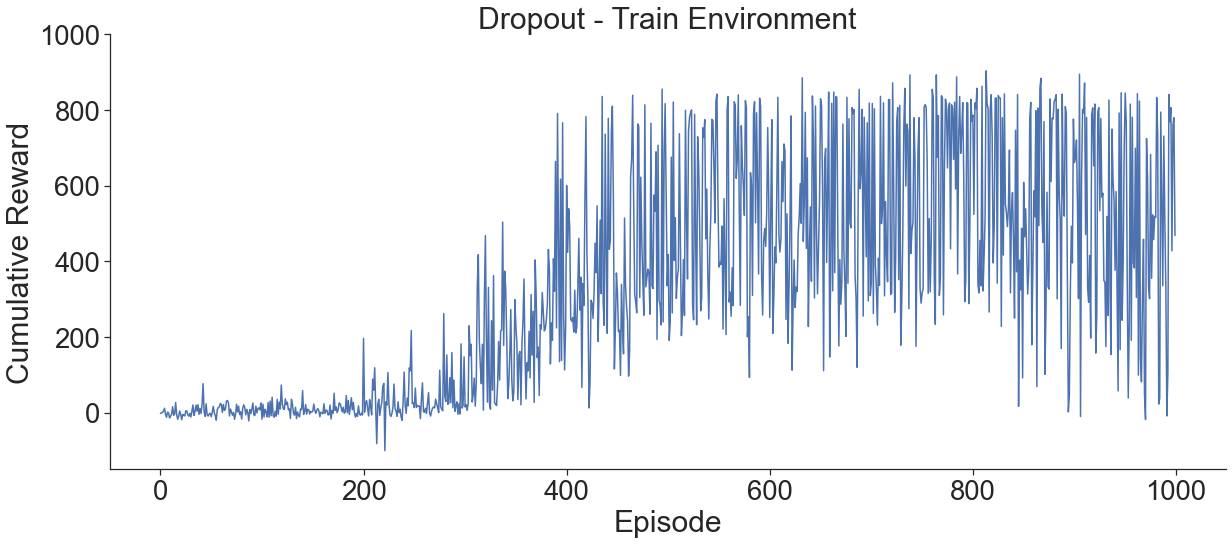

In [184]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = "ticks", rc = custom_params, font_scale = 2.5)

plt.figure(figsize = (20,8))

plt.title('Dropout - Train Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-150, 1000)
plt.plot(train_dropout['Score']);

plt.savefig('Dropout-Train.png', dpi = 600)

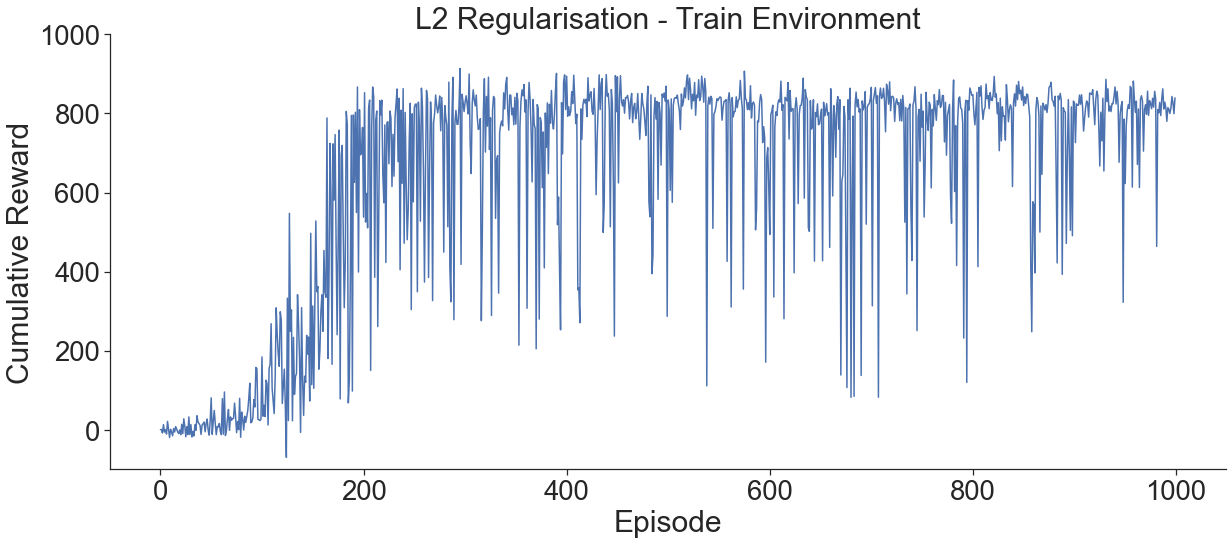

In [185]:
plt.figure(figsize = (20,8))

plt.title('L2 Regularisation - Train Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-100, 1000)
plt.plot(train_l2['Score']);

plt.savefig('L2-Train.png', dpi = 600)

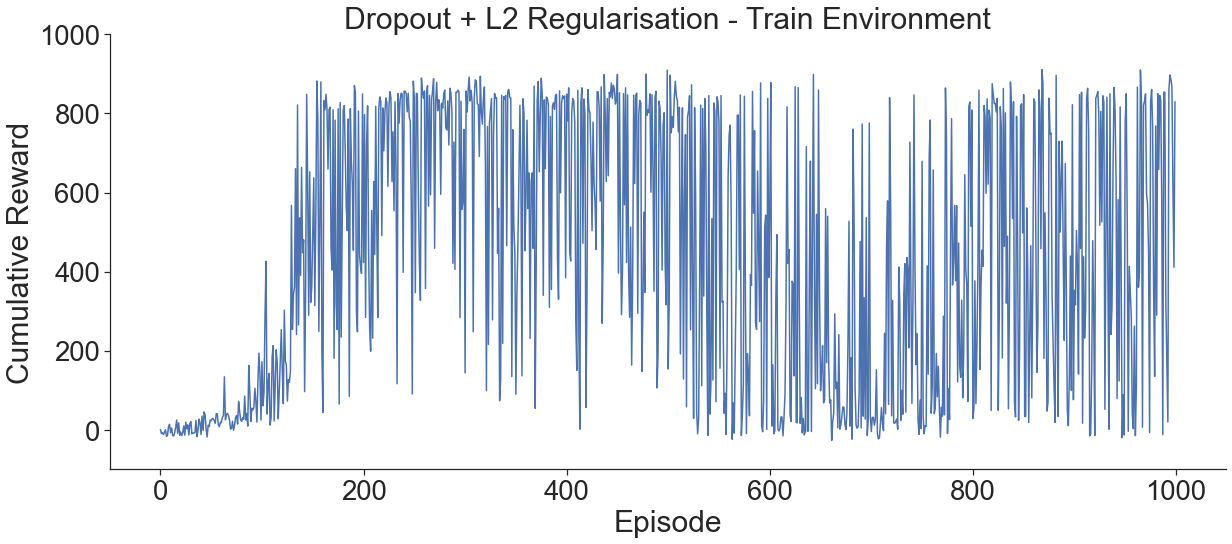

In [186]:
plt.figure(figsize = (20,8))

plt.title('Dropout + L2 Regularisation - Train Environment')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.ylim(-100, 1000)
plt.plot(train_dropout_l2['Score']);

plt.savefig('Dropout+L2-Train.png', dpi = 600)